# <center>Analytics report for Presidents Longevity</center>
### <center>Sylvia Xu</center>
### <center>December 1st 2022</center>


## Summary
This report analyzed the life span of U.S. presidents. Information is sourced from PresidentUSA.net with a total of 45 presidents. 
According to the data, The average life span of U.S. presidents(passed away) is 71 years, within a range from 94 to 46.
The life span of U.S. presidents generally follows a normal distribution, but with more longer life individuals.

### Assumptions regarding dataset:
1. Due to the availibility and responsibility of the resource, I assume the dataset is free of error (such as misspellings).
2. To simplify the outcomes and improve readbility, I purposely ignore any timezone related differences since it will have little impact towards the analysis.

In [1]:
#Import some analytic related libraries 
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Read data as df
df = pd.read_csv("U.S. Presidents Birth and Death Information - Sheet1.csv")

#Get to know the data type and shape
print(df.dtypes)
print(df.shape)
df

PRESIDENT            object
BIRTH DATE           object
BIRTH PLACE          object
DEATH DATE           object
LOCATION OF DEATH    object
dtype: object
(46, 5)


,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va."
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass."
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va."
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va."
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York"
5,John Quincy Adams,"July 11, 1767","Quincy, Mass.","Feb 23, 1848","Washington, D.C."
6,Andrew Jackson,"Mar 15, 1767","Waxhaws, No/So Carolina","June 8, 1845","Nashville, Tennessee"
7,Martin Van Buren,"Dec 5, 1782","Kinderhook, New York","July 24, 1862","Kinderhook, New York"
8,William Henry Harrison,"Feb 9, 1773","Charles City Co., Va.","Apr 4, 1841","Washington, D.C."
9,John Tyler,"Mar 29, 1790","Charles City Co., Va.","Jan 18, 1862","Richmond, Va."


In [3]:
#Remove unnecessary data and check
df.drop([len(df)-1], inplace=True)
df.tail()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
40,Bill Clinton,"Aug 19, 1946","Hope, Arkansas",NaN,NaN
41,George W. Bush,"July 6, 1946","New Haven, Conn.",NaN,NaN
42,Barack Obama,"Aug 4, 1961","Honolulu, Hawaii",NaN,NaN
43,Donald Trump,"June 14, 1946","New York, New York",NaN,NaN
44,Joe Biden,"Nov 20, 1942","Scranton, Pa.",NaN,NaN


In [4]:
#Add more rows to the dataframe
df = df.reindex(df.columns.tolist() + ['year_of_birth','lived_years', 'lived_months', 'lived_days'], axis=1)

#Change the date to datetime type（Year-Month—DAY）in order to calculate.
df['BIRTH DATE'] = pd.to_datetime(df['BIRTH DATE'])
df['DEATH DATE'] = pd.to_datetime(df['DEATH DATE'])

#Fill in blank column [year_of_birth]
df['year_of_birth'] = df['BIRTH DATE'].dt.year.astype(int)

#Fill in blank column [lived_years]
df['lived_years'] = df['DEATH DATE'] - df['BIRTH DATE']
df['lived_years'] = (df['lived_years'].fillna(pd.to_datetime(datetime.date(datetime.now())) - df['BIRTH DATE'])/ np.timedelta64(1, 'Y')).astype(int)

#Fill in blank column [lived_months]
df['lived_months'] = df['DEATH DATE'] - df['BIRTH DATE']
df['lived_months'] = (df['lived_months'].fillna(pd.to_datetime(datetime.date(datetime.now())) - df['BIRTH DATE'])/ np.timedelta64(1, 'M')).astype(int)

#Fill in blank column [lived_days]
df['lived_days'] = df['DEATH DATE'] - df['BIRTH DATE']
df['lived_days'] = (df['lived_days'].fillna(pd.to_datetime(datetime.date(datetime.now())) - df['BIRTH DATE'])/ np.timedelta64(1, 'D')).astype(int)

df

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_years,lived_months,lived_days
0,George Washington,1732-02-22,"Westmoreland Co., Va.",1799-12-14,"Mount Vernon, Va.",1732,67,813,24767
1,John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass.",1735,90,1088,33119
2,Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va.",1743,83,998,30397
3,James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va.",1751,85,1023,31150
4,James Monroe,1758-04-28,"Westmoreland Co., Va.",1831-07-04,"New York, New York",1758,73,878,26729
5,John Quincy Adams,1767-07-11,"Quincy, Mass.",1848-02-23,"Washington, D.C.",1767,80,967,29446
6,Andrew Jackson,1767-03-15,"Waxhaws, No/So Carolina",1845-06-08,"Nashville, Tennessee",1767,78,938,28574
7,Martin Van Buren,1782-12-05,"Kinderhook, New York",1862-07-24,"Kinderhook, New York",1782,79,955,29085
8,William Henry Harrison,1773-02-09,"Charles City Co., Va.",1841-04-04,"Washington, D.C.",1773,68,817,24890
9,John Tyler,1790-03-29,"Charles City Co., Va.",1862-01-18,"Richmond, Va.",1790,71,861,26227


### Note:
In order to calculate the data that represent life span, I extract today's date and used for still alive presidents' lived days,months,and  years.

In [5]:
#Draw table for Top10 longest lived president
longest_lived = df.sort_values(by = 'lived_days', ascending=False, ignore_index=True)
longest_lived_table = (longest_lived.loc[0:9, ['PRESIDENT', 'lived_days']])
longest_lived_table.index = longest_lived_table.index+1
longest_lived_table

,PRESIDENT,lived_days
1,Jimmy Carter,35855
2,George Bush,34504
3,Gerald Ford,34133
4,Ronald Reagan,34088
5,John Adams,33119
6,Herbert Hoover,32943
7,Harry S. Truman,32373
8,James Madison,31150
9,Thomas Jefferson,30397
10,Richard Nixon,29688


In [6]:
#Draw table for Top10 shortest lived president
#Remove still alive presidents' data for better clearfication as [shortest_lived]
shortest_lived = df.dropna(axis=0, how='any', inplace=False)
shortest_lived = shortest_lived.sort_values(by = 'lived_days', ascending=True, ignore_index=True)
shortest_lived_table = (shortest_lived.loc[0:9, ['PRESIDENT', 'lived_days']])
shortest_lived_table.index = shortest_lived_table.index+1
shortest_lived_table

,PRESIDENT,lived_days
1,John F. Kennedy,16978
2,James A. Garfield,18202
3,James K. Polk,19583
4,Abraham Lincoln,20516
5,Chester Arthur,20863
6,Warren G. Harding,21091
7,William McKinley,21412
8,Theodore Roosevelt,21985
9,Calvin Coolidge,22099
10,Franklin Roosevelt,23082


In [7]:
#Statistic table for [lived days] and [lived years]
a = shortest_lived['lived_days']
b = shortest_lived['lived_years']
stat = {'Mean:':[a.mean(), b.mean()], 
        #Error associated with each measurement(lived time) is the same(0)
        'Weighted average':[a.mean(), b.mean()], 
        'Median':[a.median(), b.median()], 
        'Mode':[(a//100).mode()*100,b.mode()], 
        'Max':[a.max(), b.max()], 
        'Min':[a.min(), b.min()],
        'Standard Deviation':[a.std(), b.std()]}
stat_table = pd.DataFrame(stat, index=['Lived Days', 'Lived Years']).astype(int)
stat_table.T

,Lived Days,Lived Years
Mean:,26097,71
Weighted average,26097,71
Median,25673,70
Mode,23000,67
Max,34504,94
Min,16978,46
Standard Deviation,4596,12


### Note:
In order to better deliver the statistic
1. I calculate for both lived days and lived years which fits common sense.
2. Since we have only one sample of the data, the weighted average will stay the same as mean.
3. I round lived days to hundreds to calculate mode for lived_days. (For example: 24767 days round to 24000 days)


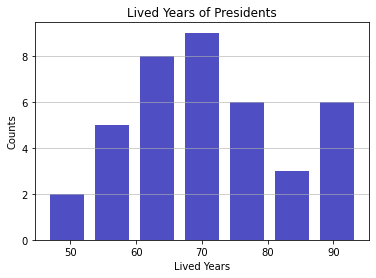

In [8]:
#Plot the distribution
x = shortest_lived['lived_years']
fig, ax = plt.subplots()

#plot the histogram
x.plot.hist(density=False, ax=ax, bins=7, color = '#0504aa', alpha=0.7, rwidth=0.75, title='Lived Years of Presidents')
ax.set_xlabel('Lived Years')
ax.set_ylabel('Counts')
ax.grid(axis='y', alpha=0.75)

### Note:
In order to better demonstrate the distribution, finer data(lived days) will show better details. However, lived years will fit better common sense. As a compromise, I first plot the histogram of lived days(h1) and than choosed the bin size that make the histogram plot of lived years(h2) looks the most like h1. Above plot is a visulization for h2.

## Conclusion: 
Distribution of Lived Days of Presidents shows strong pattern of normal distribution but with obvious increasing number of long-lived presidents. 
The longest lived president is Jimmy Carter	with a life of 35855 days and the shortest lived president is John F. Kennedy who was assassinated with a life of 16978 days.
Presidents had a avergae age of 71 years old. The standard deviation is 12 years or 4596 days means that 68% of presidents had a longevity between 59 to 83.
### Future research topics: 
1. The trend between birth year and lived days of presidents, 
2. The lived days of presidents compares to lived days of U.S. male population

From these reseaches we could find more information regarding the factors may effect the lived days of presidents and population.